# Data_cleaning_and_analysis

__We need to ask the right questions for analyze well__

__And we need to use the pandas library well__

# I've cover the following:

__* Dropping unnecessary columns in a DataFrame__<br>
__* Changing the index of a DataFrame__<br>
__* Using .str() methods to clean columns__
__* Using the DataFrame.applymap() function to clean the entire dataset, element-wise__<br>
__* Renaming columns to a more recognizable set of labels__<br>
__* Skipping unnecessary rows in a CSV file__<br>

In [235]:
#import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

# __open the CSV file__<br>


In [236]:
df="police.csv"
data=pd.read_csv(df)
data.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [174]:
data.shape

(91741, 15)

In [175]:
data.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [237]:
data.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# Remove the column that only contains missing values

In [177]:
data.drop(columns=['county_name'],inplace=True)

In [178]:
data.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [179]:
data.head(10)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,2005-03-23,09:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,2005-06-06,13:20,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,2005-07-13,10:15,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,2005-07-13,15:45,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Do men or women speed more often?

In [180]:
data[data.violation=='speeding'].driver_gender.value_counts(normalize=True)

Series([], Name: driver_gender, dtype: float64)

In [181]:
data[data.driver_gender == "M"].violation.value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [182]:
data[data.driver_gender == "M"].violation.value_counts().sum()

62895

In [183]:
data[data.driver_gender=='F'].violation.value_counts()

Speeding               15482
Moving violation        3204
Equipment               2487
Registration/plates     1013
Other                    690
Seat belt                635
Name: violation, dtype: int64

In [184]:
data[data.driver_gender=='F'].violation.value_counts().sum()

23511

In [185]:
data.groupby(by='driver_gender').violation.value_counts()

driver_gender  violation          
F              Speeding               15482
               Moving violation        3204
               Equipment               2487
               Registration/plates     1013
               Other                    690
               Seat belt                635
M              Speeding               32979
               Moving violation       13020
               Equipment               8533
               Other                   3627
               Registration/plates     2419
               Seat belt               2317
Name: violation, dtype: int64

In [186]:
data.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [187]:
data.groupby(['violation','driver_gender']).search_conducted.value_counts()

violation            driver_gender  search_conducted
Equipment            F              False                2381
                                    True                  106
                     M              False                7935
                                    True                  598
Moving violation     F              False                3088
                                    True                  116
                     M              False               12241
                                    True                  779
Other                F              False                 651
                                    True                   39
                     M              False                3456
                                    True                  171
Registration/plates  F              False                 946
                                    True                   67
                     M              False                2152
                 

# Does gender affect who gets searched during a stop?

In [188]:
data.search_conducted.mean()

0.03483720473942948

In [189]:
data.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [190]:
data.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# Why is search_type missing so often?

In [191]:
data.search_type.isnull().value_counts()

True     88545
False     3196
Name: search_type, dtype: int64

In [192]:
data.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Incident t

# Which year had the least number of stops?

In [193]:
combined =data.stop_date.str.cat(data.stop_time, sep = " ")
data["stop_datetime"] = pd.to_datetime(combined)
data["stop_datetime"]

0       2005-01-02 01:55:00
1       2005-01-18 08:15:00
2       2005-01-23 23:15:00
3       2005-02-20 17:15:00
4       2005-03-14 10:00:00
                ...        
91736   2015-12-31 20:27:00
91737   2015-12-31 20:35:00
91738   2015-12-31 20:45:00
91739   2015-12-31 21:42:00
91740   2015-12-31 22:46:00
Name: stop_datetime, Length: 91741, dtype: datetime64[ns]

In [194]:
data.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [195]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00


# How does drug activity change by time of day?

In [196]:
data.drugs_related_stop.value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64

In [197]:
#data.groupby(by='drugs_related_stop').stop_datatime.dt.hour
data.groupby(data.stop_datetime.dt.hour).drugs_related_stop.value_counts()

stop_datetime  drugs_related_stop
0              False                 5118
               True                   103
1              False                 4382
               True                    60
2              False                 2929
               True                    46
3              False                 1152
               True                    20
4              False                  251
               True                     3
5              False                  209
               True                     1
6              False                 3280
               True                    10
7              False                 4557
               True                    15
8              False                 5196
               True                    14
9              False                 6795
               True                    43
10             False                 7308
               True                    42
11             False                 5836


<AxesSubplot:xlabel='stop_datetime,drugs_related_stop'>

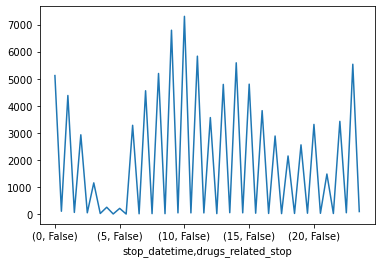

In [198]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns
data.groupby(data.stop_datetime.dt.hour).drugs_related_stop.value_counts().plot()

<AxesSubplot:xlabel='stop_datetime'>

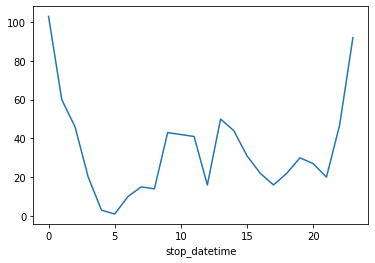

In [199]:
data.groupby(data.stop_datetime.dt.hour).drugs_related_stop.sum().plot()

# Do most stops occur at night?

<AxesSubplot:>

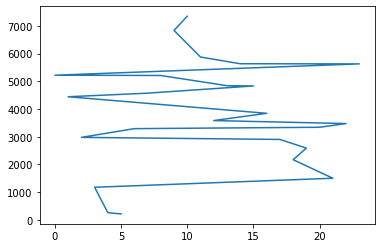

In [200]:
data.stop_datetime.dt.hour.value_counts().plot()

# Find the bad data in the stop_duration column and fix it

In [201]:
data.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [203]:
# solves SettingWithCopyWarning USE .loc
data.loc[(data.stop_duration == '1') | (data.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [204]:
data.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [205]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00


# What is the mean stop_duration for each violation_raw?


In [215]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
data['stop_minutes'] = data.stop_duration.map(mapping)

In [217]:
data.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [218]:
data.groupby('violation_raw').stop_minutes.mean()


violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

# Compare the age distributions for each violation¶


In [219]:
data.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])


,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


In [221]:
data.groupby('violation').driver_age.value_counts()


violation  driver_age
Equipment  23.0          664
           21.0          623
           22.0          601
           24.0          572
           20.0          540
                        ... 
Speeding   85.0            2
           87.0            2
           88.0            2
           15.0            1
           90.0            1
Name: driver_age, Length: 403, dtype: int64

<AxesSubplot:xlabel='violation,driver_age'>

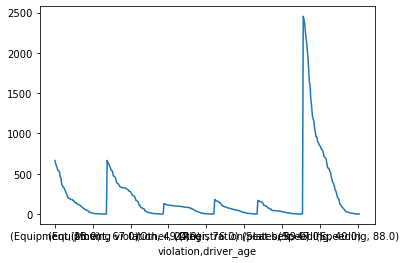

In [224]:
data.groupby('violation').driver_age.value_counts().plot()


<AxesSubplot:>

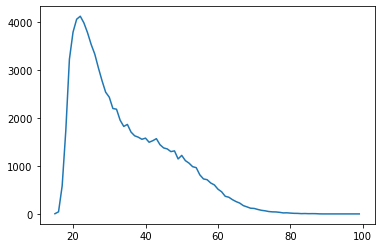

In [225]:
data.driver_age.value_counts().sort_index().plot()


array([[<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Moving violation'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Registration/plates'}>],
       [<AxesSubplot:title={'center':'Seat belt'}>,
        <AxesSubplot:title={'center':'Speeding'}>]], dtype=object)

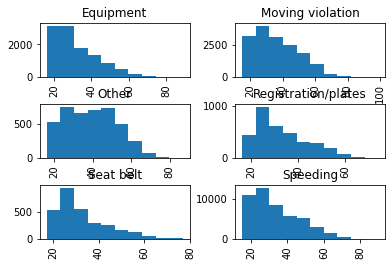

In [227]:
data.hist('driver_age', by='violation')

# Pretend you don't have the driver_age column, and create it from driver_age_raw (and call it new_age)

array([[<AxesSubplot:title={'center':'driver_age'}>,
        <AxesSubplot:title={'center':'new_age'}>]], dtype=object)

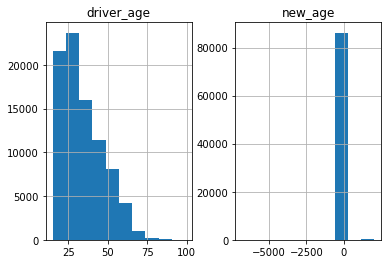

In [229]:
data['new_age'] = data.stop_datetime.dt.year - data.driver_age_raw
data[['driver_age', 'new_age']].hist()


In [230]:
data[['driver_age', 'new_age']].describe()

,driver_age,new_age
count,86120.000000,86414.000000
mean,34.011333,39.784294
std,12.738564,110.822145
min,15.000000,-6794.000000
25%,23.000000,24.000000
50%,31.000000,31.000000
75%,43.000000,43.000000
max,99.000000,2015.000000


In [232]:
data[(data.driver_age_raw.notnull()) & (data.driver_age.isnull())].head()


,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime,stop_minutes,new_age
146,2005-10-05,08:50,M,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,2005-10-05 08:50:00,8.0,2005.0
281,2005-10-10,12:05,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,2005-10-10 12:05:00,8.0,2005.0
331,2005-10-12,07:50,M,0.0,NaN,White,Motorist Assist/Courtesy,Other,False,NaN,No Action,False,0-15 Min,False,2005-10-12 07:50:00,8.0,2005.0
414,2005-10-17,08:32,M,2005.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,2005-10-17 08:32:00,8.0,0.0
455,2005-10-18,18:30,F,0.0,NaN,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,2005-10-18 18:30:00,8.0,2005.0


# The end: